<a href="https://colab.research.google.com/github/mariell-morven/Riesgo_Relativo/blob/main/Riesgo_Relativo_2_%26_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 2

In [ ]:
# Importación de librerías,
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# & paquetes
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.cloud import bigquery
from google.colab import auth

# Autenticación
auth.authenticate_user()

# BigQuery
project_id = 'proyecto-no3-riesgos'
client = bigquery.Client(project=project_id)

In [ ]:
# Query SQL
query = """
SELECT
  default_flag,
  new_flag
FROM proyecto-no3-riesgos.dataset.scores
"""

# Ejecutar la consulta en BigQuery y obtener los resultados
query_job = client.query(query)
results = query_job.to_dataframe()

## Matriz de Confusión

* Con un *Score Crediticio de 10 a 13*, se considera al usuario como un: **Mal Pagador.**
*  Con un *Score Crediticio de 0 a 9*, se considera al usuario como un: **Buen Pagador**.

---


Con base en el riesgo relativo previamente calculado (Hito 1) se obtuvo el score crediticio a partir de las siguientes variables:
1. age
2. last_month_salary
3. loans
4. more_90_days_overdue
5. using_lines_not_secured_personal_assets

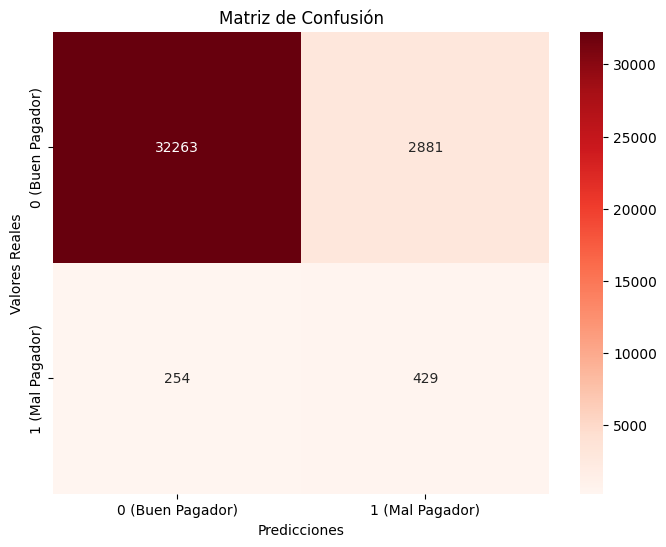

Matriz de Confusión:
[[32263  2881]
 [  254   429]]

Métricas de Evaluación:
Exactitud (Accuracy):  0.912
Precisión:  0.130
Sensibilidad (Recall):  0.628
F1-score:  0.215


In [ ]:
# Obtener las etiquetas verdaderas y predichas
y_true = results['default_flag']
y_pred = results['new_flag']

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Visualización gráfica de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds", xticklabels=['0 (Buen Pagador)', '1 (Mal Pagador)'], yticklabels=['0 (Buen Pagador)', '1 (Mal Pagador)'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar la Matriz de Confusión
print("\033[1mMatriz de Confusión:\033[0m")
print(cm)

# Mostrar las Métricas de Evaluación
print("\n\033[1mMétricas de Evaluación:\033[0m")
print(f"Exactitud (Accuracy): {accuracy: .3f}")
print(f"Precisión: {precision: .3f}")
print(f"Sensibilidad (Recall): {recall: .3f}")
print(f"F1-score: {f1: .3f}")

Aunque la exactitud del modelo es alta así su sensibilidad y en particular su precisión es baja, es decir que aunque el modelo puede a identificar correctamente la mayoría de los casos positivos reales, tiende a clasificar erróneamente una proporción significativa de casos negativos como positvos (falsos positivos).

#Hito 3

## Regresión Lógistica

In [ ]:
# Query SQL
query = """
SELECT
* EXCEPT (user_id)
FROM proyecto-no3-riesgos.dataset.scores
"""

# Ejecutar la consulta en BigQuery y obtener los resultados
query_job = client.query(query)
data = query_job.to_dataframe()

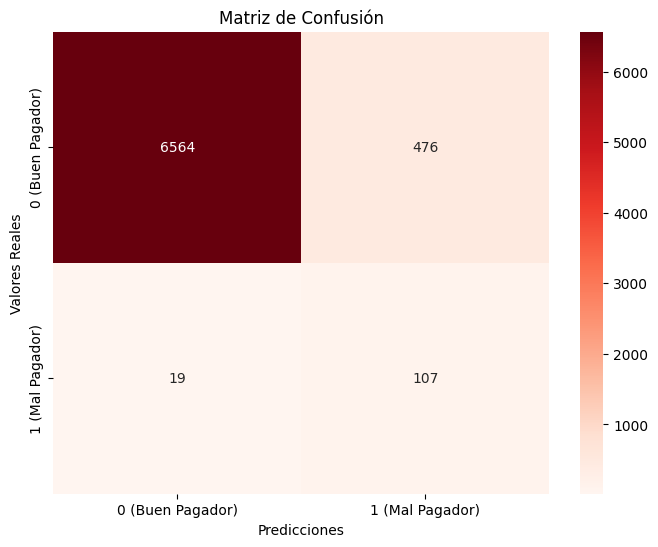

Matriz de Confusión:
[[6564  476]
 [  19  107]]

Métricas de Evaluación:
Exactitud (Accuracy):  0.931
Precisión:  0.184
Sensibilidad (Recall):  0.849
F1-score:  0.302


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.cloud import bigquery

# Separar las características (X) y la variable dependiente (y)
X = data[['age_dummy','dependents_dummy', 'salary_dummy', 'loans_dummy', 'real_estate_dummy', 'others_dummy', 'overdue_dummy', 'credit_dummy', 'debt_dummy']]
y = data['default_flag']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de regresión logística con peso de clase
model = LogisticRegression(class_weight='balanced')

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular métricas de evaluación
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Visualización gráfica de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Reds", xticklabels=['0 (Buen Pagador)', '1 (Mal Pagador)'], yticklabels=['0 (Buen Pagador)', '1 (Mal Pagador)'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Imprimir resultados
print("\033[1mMatriz de Confusión:\033[0m")
print(conf_matrix)

print("\n\033[1mMétricas de Evaluación:\033[0m")
print(f"Exactitud (Accuracy): {accuracy: .3f}")
print(f"Precisión: {precision: .3f}")
print(f"Sensibilidad (Recall): {sensitivity: .3f}")
print(f'F1-score: {f1_score: .3f}')

En comparación, de acuerdo con la exactitud calculada, el modelo por regresión lógistica posee un mejor rendimiento en general. La métrica de evaluación F1-score incrementa moderamente con el nuevo valor de sensibilidad, sin embargo la precisión se reduce ligeramente, es decir, que apesar de identificar los verdaderos positivos (malos pagadores) de forma más fiel su errónea diferenciación respecto a los falsos positvos continua.